In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [ ]:
calories.head(2)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0


In [ ]:
exercise.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3


In [ ]:
df = exercise.merge(calories,on='User_ID')

In [ ]:
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0


In [ ]:
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

In [ ]:
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0


In [ ]:
X = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']

In [ ]:
X.shape

(15000, 7)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(10500, 7)

In [ ]:
X_test.shape


(4500, 7)

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
models = {
    'lr': LinearRegression(),
    'rd': Ridge(),
    'ls': Lasso(),
    'dtr': DecisionTreeRegressor(),
    'rfr': RandomForestRegressor()
}

In [ ]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R2 Score': r2})

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
st.title("Model Performance Comparison")


DeltaGenerator()

In [ ]:
st.subheader("Performance Metrics")
st.dataframe(results_df)

DeltaGenerator()

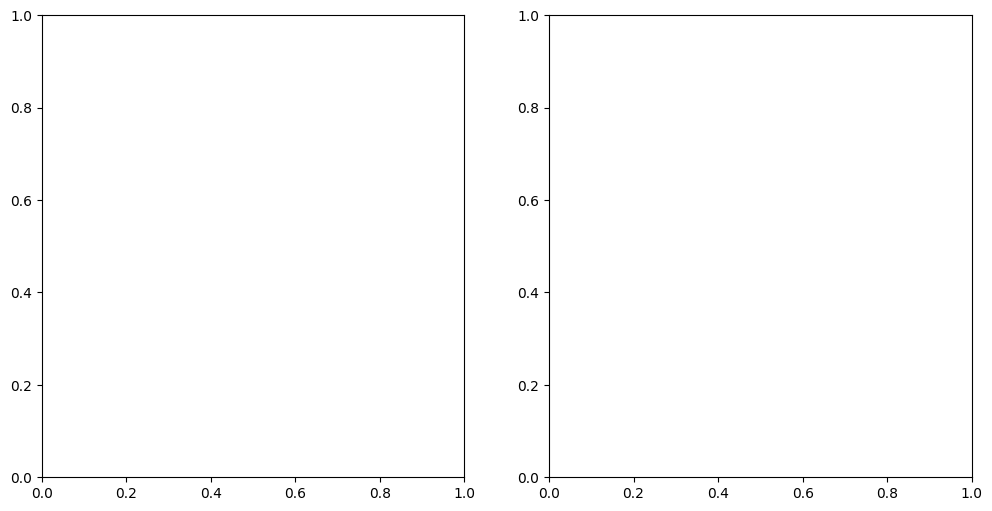

In [ ]:
st.subheader("Performance Metrics Comparison")
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

In [ ]:
ax[0].bar(results_df['Model'], results_df['MSE'], color='skyblue')
ax[0].set_title('Mean Squared Error')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MSE')
ax[0].set_xticklabels(results_df['Model'], rotation=45)

<ipython-input-67-feba390a88f9>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(results_df['Model'], rotation=45)


[Text(0, 0, 'lr'),
 Text(1, 0, 'rd'),
 Text(2, 0, 'ls'),
 Text(3, 0, 'dtr'),
 Text(4, 0, 'rfr')]

In [ ]:
ax[1].bar(results_df['Model'], results_df['R2 Score'], color='lightgreen')
ax[1].set_title('R2 Score')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R2 Score')
ax[1].tick_params(axis='x', rotation=45)

In [ ]:
st.pyplot(fig)

DeltaGenerator()

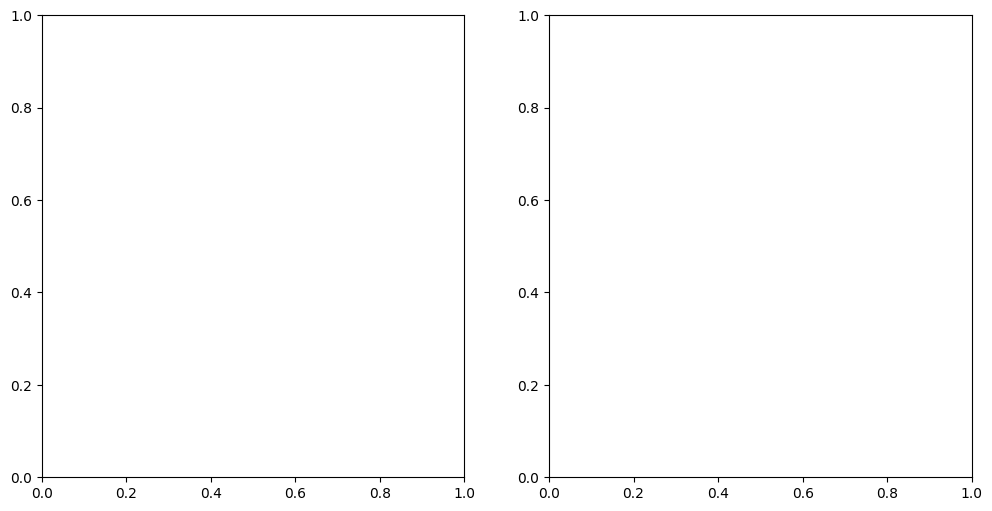

<ipython-input-39-feba390a88f9>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(results_df['Model'], rotation=45)


[Text(0, 0, 'lr'),
 Text(1, 0, 'rd'),
 Text(2, 0, 'ls'),
 Text(3, 0, 'dtr'),
 Text(4, 0, 'rfr')]

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

KeyboardInterrupt: 

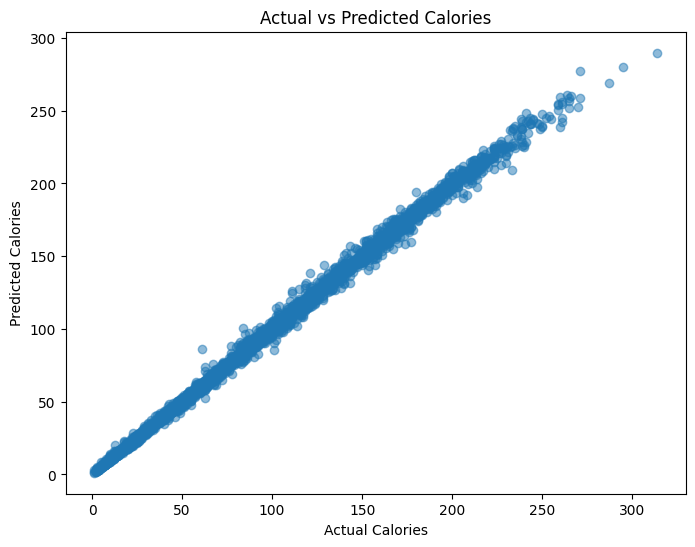

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/mlprojectfolder')

Mounted at /content/mlprojectfolder


In [ ]:
# import pickle
import pickle
with open('/content/mlprojectfolder/My Drive/rfr.pkl', 'wb') as f:pickle.dump(rfr, f)

In [ ]:
# pickle.dump(rfr,open('rfr.pkl','wb'))
X_train.to_csv('/content/mlprojectfolder/My Drive/X_train_data.csv')

In [ ]:
rfr = pickle.load(open('/content/mlprojectfolder/My Drive/rfr.pkl','rb'))
x_train = pd.read_csv('/content/mlprojectfolder/My Drive/X_train_data.csv')

In [ ]:
def pred(Gender,Age,Height,Weight,Duration,Heart_rate,Body_temp):
    features = np.array([[Gender,Age,Height,Weight,Duration,Heart_rate,Body_temp]])
    prediction = rfr.predict(features).reshape(1,-1)
    return prediction[0]

In [ ]:
if st.button('predict'):
    if result:
        st.write("You have consumed this calories :",result)